# CVPE Assignmet - 2

# Nural Network

Import libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import dataset

In [65]:
dataset = pd.read_csv('data.csv')
dataset.sample(20)

,species,bill_length_mm,flipper_length_mm
90,Adelie,35.7,202.0
140,Adelie,40.2,193.0
88,Adelie,38.3,189.0
123,Adelie,41.4,202.0
342,Chinstrap,50.8,210.0
263,Gentoo,49.8,229.0
339,Chinstrap,55.8,207.0
288,Chinstrap,47.0,185.0
87,Adelie,36.9,189.0
196,Gentoo,50.5,222.0


In [66]:
x = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

Find missing value and infinite value

In [67]:
nan_indices = np.where(np.isnan(x))
inf_indices = np.where(np.isinf(x))

print("Missing indices:", nan_indices)
print("Infinite indices:", inf_indices)

Missing indices: (array([  3,   3, 271, 271]), array([0, 1, 0, 1]))
Infinite indices: (array([], dtype=int64), array([], dtype=int64))


In [68]:
col_means = np.nanmean(x, axis=0)
for i in range(x.shape[1]):
    x[np.isnan(x[:, i]), i] = col_means[i]

In [69]:
assert np.isfinite(x).all(), "There are infinite values in the dataset."

In [70]:
y[:20]

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie'], dtype=object)

Encoding and one-hot encoding of labels

In [71]:
labels, y_encoded = np.unique(y, return_inverse=True)
labels, y_encoded[:20]

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [72]:
y_one_hot = np.eye(len(labels))[y_encoded]
y_one_hot.shape, y_one_hot[:20]

((344, 3),
 array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]]))

Plotting scatter plot

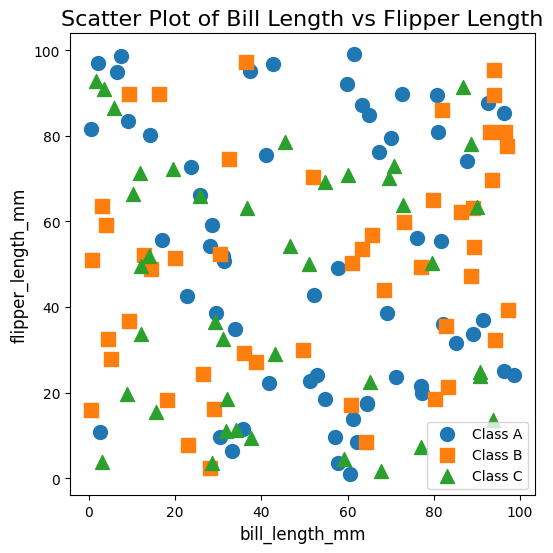

In [73]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
X = np.random.rand(150, 2) * 100
y_encoded = np.random.choice([0, 1, 2], size=150)
labels = {0: "Class A", 1: "Class B", 2: "Class C"}


markers = ['o', 's', '^']
plt.figure(figsize=(6, 6))


for label, marker in zip(np.unique(y_encoded), markers):
    plt.scatter(
        X[y_encoded == label, 0],
        X[y_encoded == label, 1],
        label=labels[label],
        marker=marker,
        s=100
    )

plt.xlabel("bill_length_mm", fontsize=12)
plt.ylabel("flipper_length_mm", fontsize=12)

plt.legend(fontsize=10)
plt.title("Scatter Plot of Bill Length vs Flipper Length", fontsize=16)
plt.show()


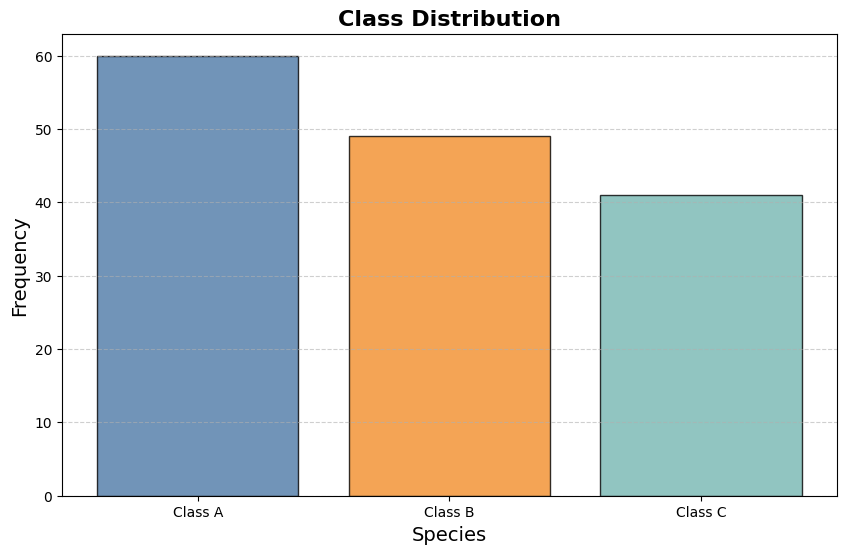

In [74]:

labels = {0: "Class A", 1: "Class B", 2: "Class C"}

label_names = list(labels.values())

colors = ['#4E79A7', '#F28E2B', '#76B7B2']

plt.figure(figsize=(10, 6))
plt.bar(
    label_names,
    np.bincount(y_encoded),
    color=colors,
    edgecolor='black',
    alpha=0.8
)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Class Distribution', fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



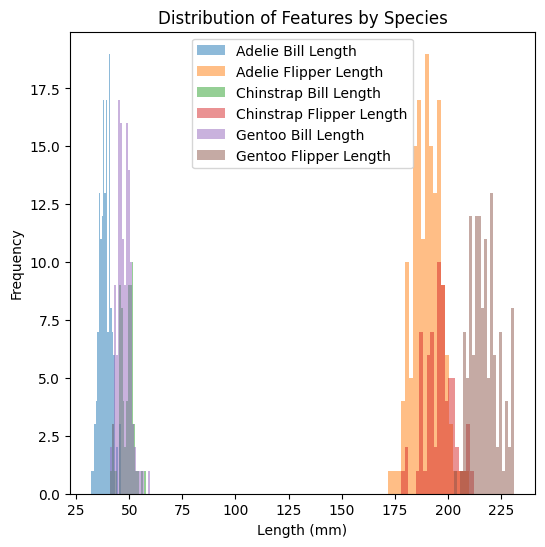

In [75]:
plt.figure(figsize=(6, 6))

for label in np.unique(y):
    subset = dataset[dataset['species'] == label]
    plt.hist(subset['bill_length_mm'], alpha=0.5, label=f'{label} Bill Length', bins=20)
    plt.hist(subset['flipper_length_mm'], alpha=0.5, label=f'{label} Flipper Length', bins=20)

plt.xlabel('Length (mm)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Features by Species')
plt.show()

In [76]:

indices = np.random.permutation(len(X))

split_ratio = 0.8
train_size = int(len(X) * split_ratio)

train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train = X[train_indices]
X_test = X[test_indices]
y_train = y_one_hot[train_indices]
y_test = y_one_hot[test_indices]

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (120, 2)
X_test shape: (30, 2)
y_train shape: (120, 3)
y_test shape: (30, 3)


Normalizing

In [77]:
def normalize_features(X):
    feature_means = np.mean(X, axis=0)
    feature_stds = np.std(X, axis=0)

    X_normalized = (X - feature_means) / feature_stds

    return X_normalized

In [78]:

X_train_normalized = normalize_features(X_train)
X_test_normalized = normalize_features(X_test)

print(X_train_normalized[:20])
print()
print(X_test_normalized[:20])

[[-1.59639258e+00 -1.16472431e+00]
 [ 1.03913656e+00  1.30679045e+00]
 [-6.04622034e-01 -5.84294492e-01]
 [ 7.60263937e-01  3.81380807e-01]
 [ 1.44403595e+00 -5.91287499e-01]
 [ 1.18531039e+00  4.68386493e-01]
 [ 4.49292976e-02  3.83594800e-02]
 [ 1.43608962e+00  1.63588432e+00]
 [ 2.61936099e-01 -1.60564112e+00]
 [ 4.68613376e-01 -1.43544900e+00]
 [-7.61975194e-04 -6.70118557e-01]
 [ 4.78796714e-01 -1.11684797e+00]
 [ 5.66207814e-01  9.56817120e-01]
 [ 1.53051392e+00  1.00453396e+00]
 [-1.51091092e+00  5.14687624e-01]
 [-9.79839689e-01  8.18511736e-01]
 [-1.03370323e-01  1.83588837e-01]
 [-1.31097011e+00  1.43562421e+00]
 [ 1.66149192e-01  7.10611405e-01]
 [-1.50131699e+00  1.47836723e+00]]

[[ 0.03401649 -0.79473406]
 [-1.19527847  0.11815535]
 [ 1.0348246   0.57305306]
 [ 0.42053839  1.31539964]
 [-0.70641591 -1.39228662]
 [ 0.18456204 -1.27961534]
 [-0.72689937  0.89656512]
 [ 0.93414634 -1.35714176]
 [ 1.52435113  1.10311478]
 [ 1.44190368 -0.76979909]
 [-1.88156076  1.50595927]
 

Class: Neural Network

In [79]:
class NeuralNetwork:
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayer1Neurons = 5
        hiddenLayer2Neurons = 5
        hiddenLayer3Neurons = 5
        outputLayerNeurons = 3

        self.learning_rate = 0.001

        self.W_H1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_H3 = np.random.randn(hiddenLayer2Neurons, hiddenLayer3Neurons)
        self.W_O = np.random.randn(hiddenLayer3Neurons, outputLayerNeurons)

        self.b_H1 = np.random.randn(1, hiddenLayer1Neurons)
        self.b_H2 = np.random.randn(1, hiddenLayer2Neurons)
        self.b_H3 = np.random.randn(1, hiddenLayer3Neurons)
        self.b_O = np.random.randn(1, outputLayerNeurons)

    def relu(self, x, der=False):
        if der:
            return np.where(x > 0, 1, 0)
        else:
            return np.maximum(0, x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        # Layer 1
        self.hidden_input1 = np.dot(X, self.W_H1) + self.b_H1
        self.hidden_output1 = self.relu(self.hidden_input1)

        # Layer 2
        self.hidden_input2 = np.dot(self.hidden_output1, self.W_H2) + self.b_H2
        self.hidden_output2 = self.relu(self.hidden_input2)

        # Layer 3
        self.hidden_input3 = np.dot(self.hidden_output2, self.W_H3) + self.b_H3
        self.hidden_output3 = self.relu(self.hidden_input3)

        # Output layer
        self.output_input = np.dot(self.hidden_output3, self.W_O) + self.b_O
        pred = self.softmax(self.output_input)

        return pred

    def backPropagation(self, X, Y, pred):
        # Output layer error and delta
        output_error = Y - pred
        output_delta = output_error

        # Hidden layer 3 error and delta
        hidden_error3 = output_delta.dot(self.W_O.T)
        hidden_delta3 = hidden_error3 * self.relu(self.hidden_input3, der=True)

        # Hidden layer 2 error and delta
        hidden_error2 = hidden_delta3.dot(self.W_H3.T)
        hidden_delta2 = hidden_error2 * self.relu(self.hidden_input2, der=True)

        # Hidden layer 1 error and delta
        hidden_error1 = hidden_delta2.dot(self.W_H2.T)
        hidden_delta1 = hidden_error1 * self.relu(self.hidden_input1, der=True)

        # Updates weights and biases
        self.W_O += self.learning_rate * self.hidden_output3.T.dot(output_delta)
        self.b_O += self.learning_rate * np.sum(output_delta, axis=0, keepdims=True)

        self.W_H3 += self.learning_rate * self.hidden_output2.T.dot(hidden_delta3)
        self.b_H3 += self.learning_rate * np.sum(hidden_delta3, axis=0, keepdims=True)

        self.W_H2 += self.learning_rate * self.hidden_output1.T.dot(hidden_delta2)
        self.b_H2 += self.learning_rate * np.sum(hidden_delta2, axis=0, keepdims=True)

        self.W_H1 += self.learning_rate * X.T.dot(hidden_delta1)
        self.b_H1 += self.learning_rate * np.sum(hidden_delta1, axis=0, keepdims=True)

    def train(self, X, Y):
        # Forward pass
        output = self.feedForward(X)

        # Backward pass
        self.backPropagation(X, Y, output)

Categorical cross entropy and accuracy

In [80]:
def categorical_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-9, 1 - 1e-9)
    return -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]

In [81]:
def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

Training the nural network

In [90]:
NN = NeuralNetwork()
epochs = 10000
err = []
acc = []

for epoch in range(epochs):
    NN.train(X_train_normalized, y_train)
    y_pred = NN.feedForward(X_train_normalized)
    err.append(categorical_cross_entropy(y_train, y_pred))
    acc.append(accuracy(y_train, y_pred))

    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs} - Loss: {err[epoch]:.4f}, Accuracy: {acc[epoch]:.4f}")

Epoch 0/10000 - Loss: 1.0708, Accuracy: 0.6083
Epoch 100/10000 - Loss: 0.0010, Accuracy: 1.0000
Epoch 200/10000 - Loss: 0.0004, Accuracy: 1.0000
Epoch 300/10000 - Loss: 0.0002, Accuracy: 1.0000
Epoch 400/10000 - Loss: 0.0002, Accuracy: 1.0000
Epoch 500/10000 - Loss: 0.0001, Accuracy: 1.0000
Epoch 600/10000 - Loss: 0.0001, Accuracy: 1.0000
Epoch 700/10000 - Loss: 0.0001, Accuracy: 1.0000
Epoch 800/10000 - Loss: 0.0001, Accuracy: 1.0000
Epoch 900/10000 - Loss: 0.0001, Accuracy: 1.0000
Epoch 1000/10000 - Loss: 0.0001, Accuracy: 1.0000
Epoch 1100/10000 - Loss: 0.0001, Accuracy: 1.0000
Epoch 1200/10000 - Loss: 0.0000, Accuracy: 1.0000
Epoch 1300/10000 - Loss: 0.0000, Accuracy: 1.0000
Epoch 1400/10000 - Loss: 0.0000, Accuracy: 1.0000
Epoch 1500/10000 - Loss: 0.0000, Accuracy: 1.0000
Epoch 1600/10000 - Loss: 0.0000, Accuracy: 1.0000
Epoch 1700/10000 - Loss: 0.0000, Accuracy: 1.0000
Epoch 1800/10000 - Loss: 0.0000, Accuracy: 1.0000
Epoch 1900/10000 - Loss: 0.0000, Accuracy: 1.0000
Epoch 2000/1

Plotting training loss and accuracy

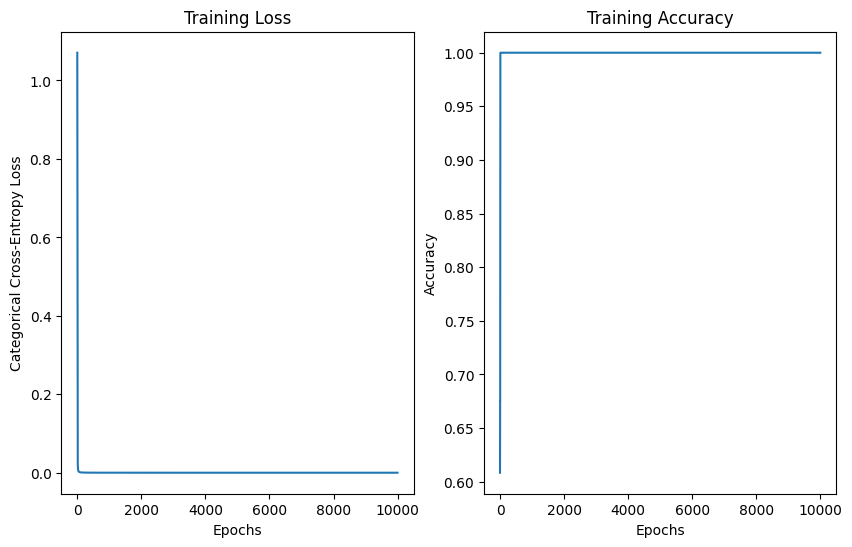

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].plot(err)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Categorical Cross-Entropy Loss')
ax[0].set_title('Training Loss')

ax[1].plot(acc)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Training Accuracy')

plt.show()


In [84]:
y_test_pred = NN.feedForward(X_test_normalized)

test_loss = categorical_cross_entropy(y_test, y_test_pred)
test_accuracy = accuracy(y_test, y_test_pred)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2%}")

Test Loss: 0.0000
Test Accuracy: 100.00%


plotting confusion matrix

<Figure size 800x600 with 0 Axes>

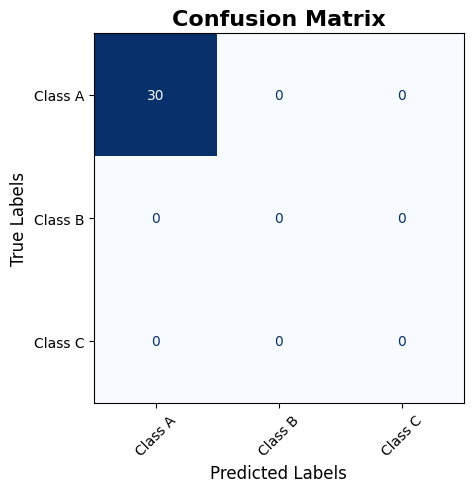

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

labels = ["Class A", "Class B", "Class C"]
all_possible_labels = [0, 1, 2]

y_test_pred_labels = np.argmax(y_test_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_labels, y_test_pred_labels, labels=all_possible_labels)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=labels
)
disp.plot(
    cmap='Blues',
    xticks_rotation=45,
    colorbar=False
)
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()



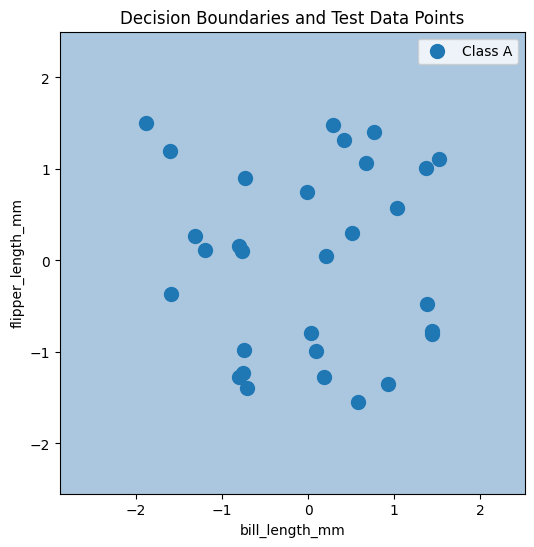

In [86]:
from matplotlib.colors import ListedColormap

x_min, x_max = X_test_normalized[:, 0].min() - 1, X_test_normalized[:, 0].max() + 1
y_min, y_max = X_test_normalized[:, 1].min() - 1, X_test_normalized[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_pred = NN.feedForward(grid_points)
grid_pred_classes = np.argmax(grid_pred, axis=1)

plt.figure(figsize=(6, 6))
cmap = ListedColormap(['#2b75b1', '#fd8529', '#2f9d35'])
plt.contourf(xx, yy, grid_pred_classes.reshape(xx.shape), alpha=0.4, cmap=cmap)

for label, marker in zip(np.unique(y_test_labels), markers):
    plt.scatter(X_test_normalized[y_test_labels == label, 0],
                X_test_normalized[y_test_labels == label, 1],
                label=labels[label],
                marker=marker,
                s=100)

plt.xlabel("bill_length_mm")
plt.ylabel("flipper_length_mm")
plt.legend()
plt.title("Decision Boundaries and Test Data Points")
plt.show()
